### ENCODING THE DEPENDENT VARIABLE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data= pd.read_csv("heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### WITHOUT OUTLIERS MODEL

### Remove outlier

In [3]:
data["sex"].unique()

array([1, 0], dtype=int64)

In [392]:
df_new_IQR_AD

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
13,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
14,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
29,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
996,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
1003,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
1013,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0


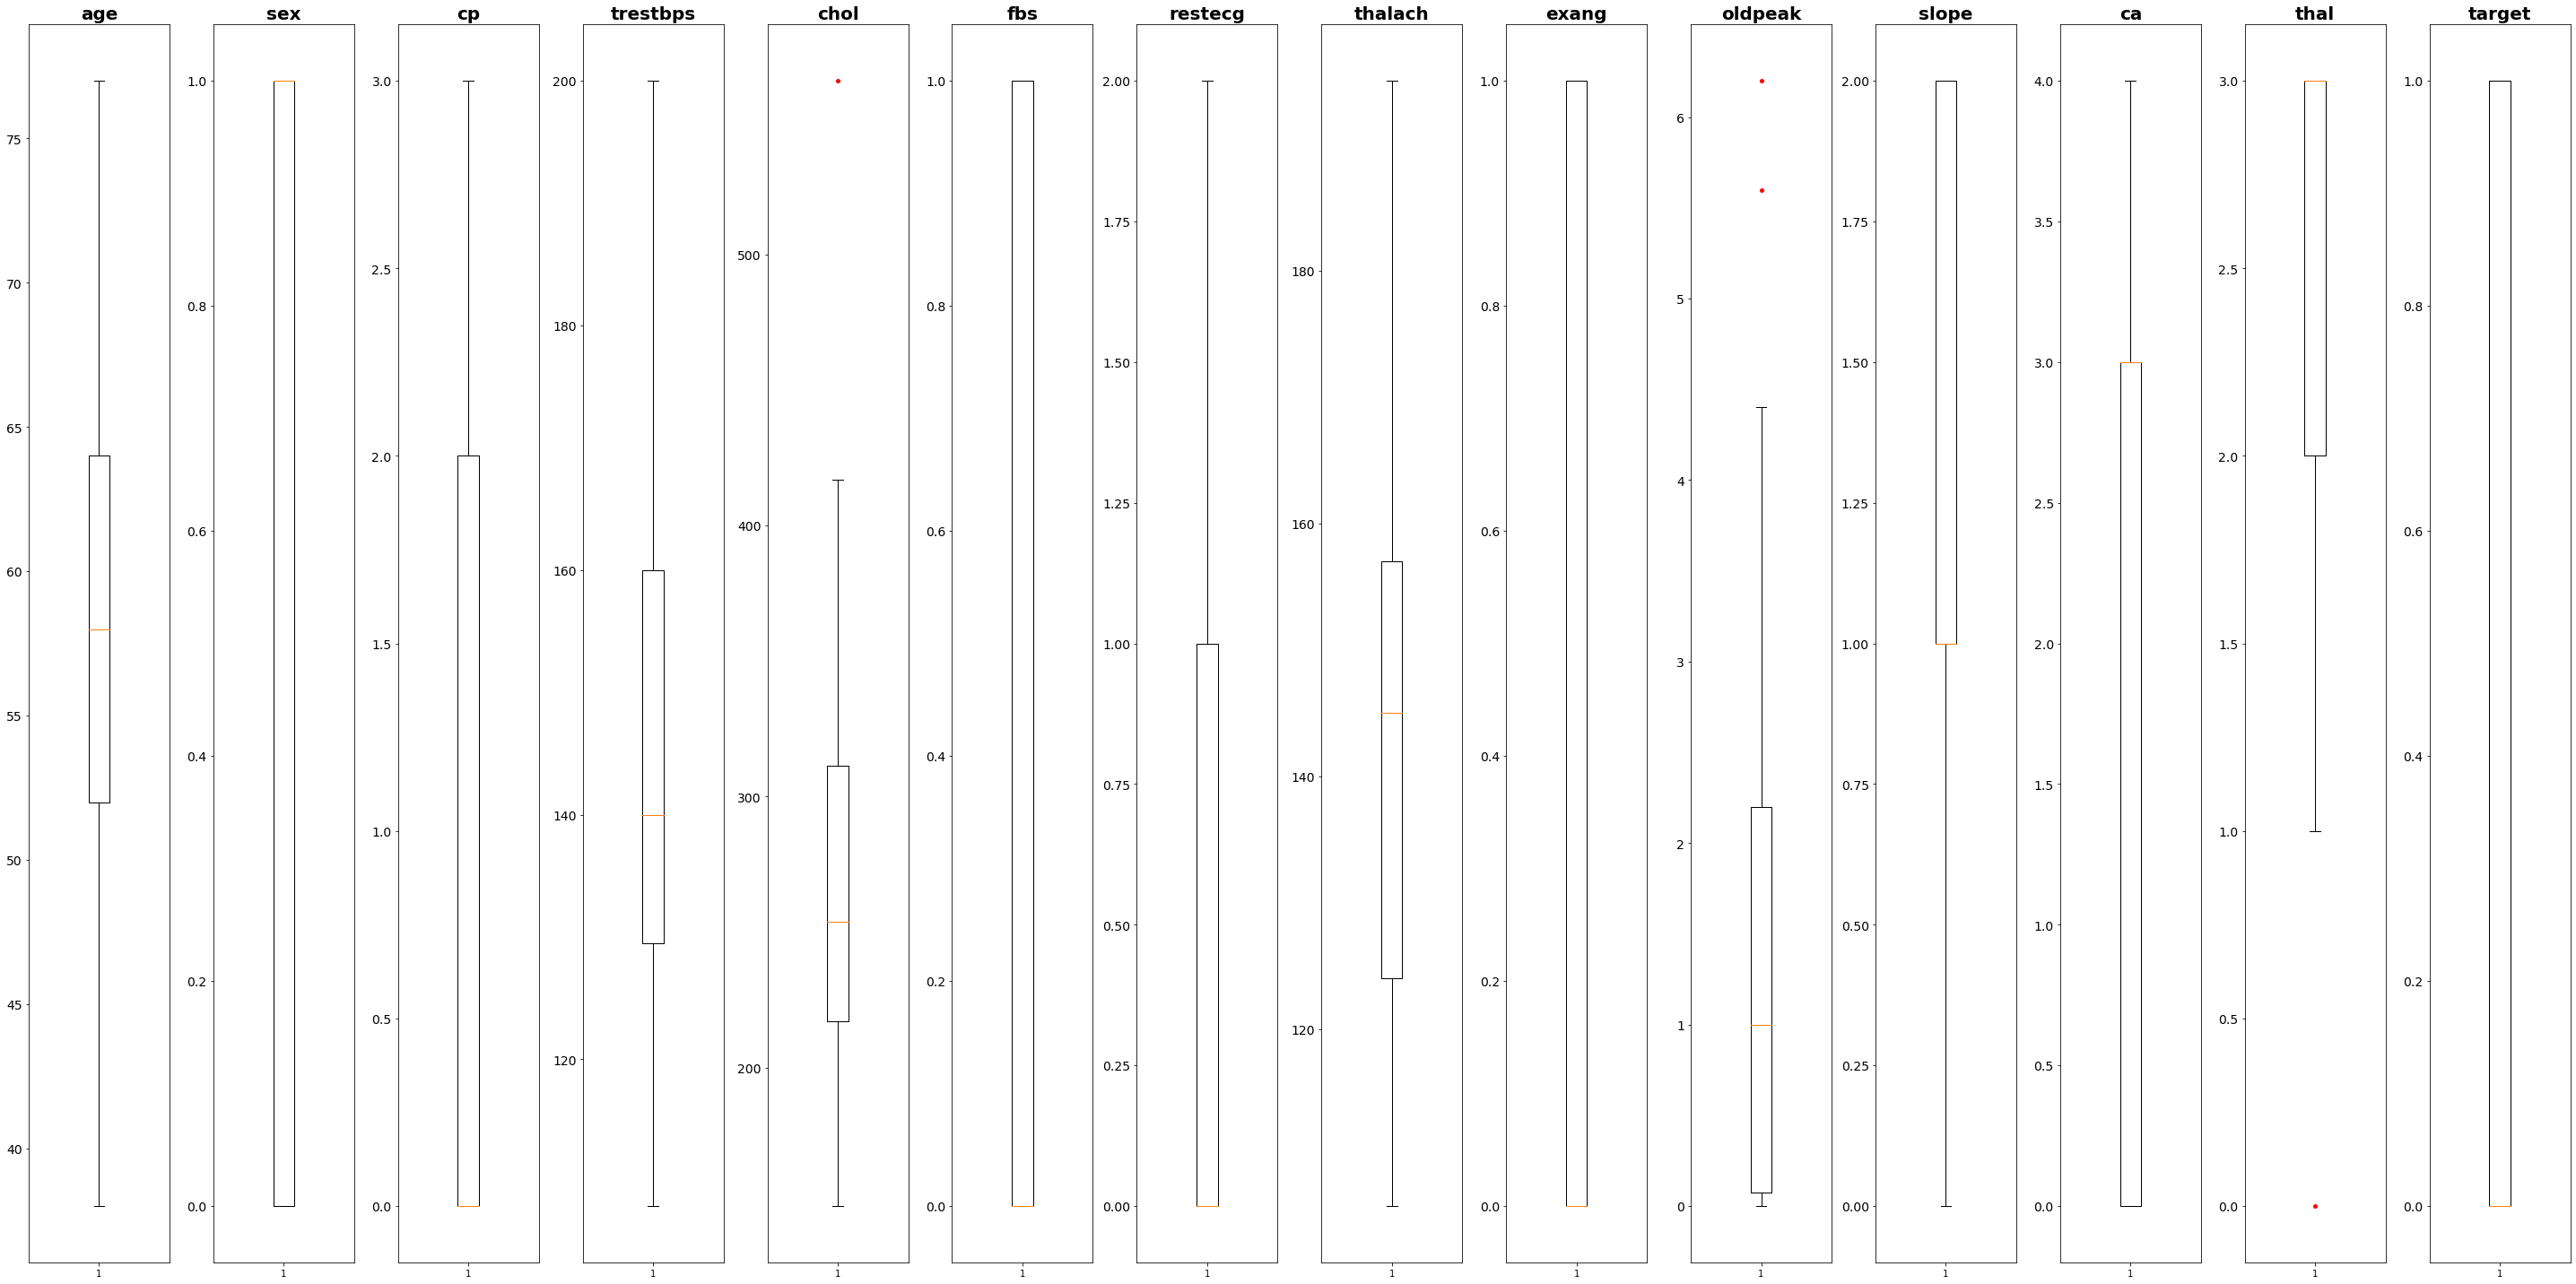

In [11]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
x=data.drop(["target"],axis=1)
y=data["target"]

In [6]:
x.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [7]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [8]:
x.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [9]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [10]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x.loc[:,["age","trestbps","chol","thalach","oldpeak",'slope', 'ca', 'thal']]=sc.fit_transform(x.loc[:,["age","trestbps","chol","thalach","oldpeak",'slope', 'ca', 'thal']])

In [11]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,0.995433,1.209221,1.089852
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,-2.243675,-0.731971,1.089852
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,-2.243675,-0.731971,1.089852
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,0.995433,0.238625,1.089852
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,-0.624121,2.179817,-0.522122
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,1,1,0.479107,-0.484803,0,1,0.647366,1,-0.912329,0.995433,-0.731971,-0.522122
1021,0.613800,1,0,-0.377636,0.232705,0,0,-0.352873,1,1.471705,-0.624121,0.238625,1.089852
1022,-0.819834,1,0,-1.234378,0.562371,0,0,-1.353113,1,-0.060888,-0.624121,0.238625,-0.522122
1023,-0.488996,0,0,-1.234378,0.155137,0,0,0.429923,0,-0.912329,0.995433,-0.731971,-0.522122


###   WITH Principle component analyss

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca=PCA(0.95)#give me 95% variation

In [14]:
pca.fit(x)

PCA(n_components=0.95)

In [15]:
x_pca=pca.transform(x)

In [16]:
x.shape

(1025, 13)

In [17]:
x_pca.shape

(1025, 10)

In [18]:
y.shape

(1025,)

In [19]:
pca.explained_variance_ratio_#Gives how much information it takes


array([0.25531137, 0.12917273, 0.11612389, 0.0993075 , 0.09220522,
       0.07740977, 0.07341542, 0.04520516, 0.03989343, 0.02726914])

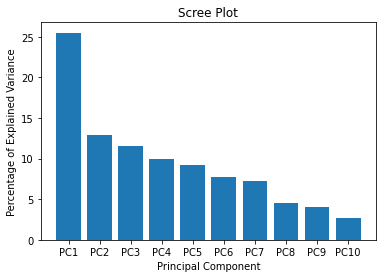

In [20]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

### Now splitting the dataset according to this PCA 

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.2,random_state=30)

In [22]:
x_train.shape

(820, 10)

### TRAINING THE LOGISTIC REGRESSION MODEL ON THE TRAINING SET

In [23]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

### PREDICITNG THE TEST SET

In [25]:
y_test_pred_lg=classifier.predict(x_train)
from sklearn.metrics import confusion_matrix, accuracy_score

accuracy_score(y_train,y_test_pred_lg)

0.8585365853658536

In [26]:
y_pred_= classifier.predict(x_test)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
confusion_matrix(y_test,y_pred_)


array([[80, 23],
       [ 5, 97]], dtype=int64)

In [29]:
print(classification_report(y_test,y_pred_))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85       103
           1       0.81      0.95      0.87       102

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.88      0.86      0.86       205



In [30]:
accuracy_score(y_test,y_pred_)

0.8634146341463415

In [24]:
y_pred= classifier.predict(x_test)

In [36]:
y_pred.shape

(205,)

### MAKING THE CONFUSION MATRIX AND ACCURACY SCORE

In [111]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
confusion_matrix(y_test,y_pred)


array([[80, 23],
       [ 5, 97]], dtype=int64)

In [113]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85       103
           1       0.81      0.95      0.87       102

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.88      0.86      0.86       205



###  ACCURACY OF THE MODEL

In [39]:
accuracy_score(y_test,y_pred)

0.8634146341463415

In [32]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 70.25 %
Standard Deviation: 1.90 %


##### BUILD LOGISTIC REGRESSION WITH HYPERPARAMETEE

In [24]:
logModel=LogisticRegression()

In [25]:
param_grid=[
    {'penalty': ["l1", "l2", "elasticnet", "none"],
     "C": np.logspace(-4,4,20),
     "solver": ["lbfgs","newton-cg","liblinear","sag","saga"],
     "max_iter": [100,1000,2500,5000]
        
    }
]

### IMPORT Grid search

In [590]:
from sklearn.model_selection import GridSearchCV

In [591]:
clf=GridSearchCV(logModel,param_grid=param_grid,cv=3,verbose=True,n_jobs=-1)

In [592]:
best_clf=clf.fit(x_train,y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 4120 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:    9.2s finished
C:\Users\shiwam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [593]:
best_clf.best_estimator_

LogisticRegression(C=0.0001, penalty='none')

In [594]:
best_clf.score(x_train,y_train)

1.0

### CLASSIFICATION REPORT

### KERNEL-SVM

In [67]:
from sklearn.svm import SVC
classifier1= SVC(kernel="rbf",random_state=0)
classifier1.fit(x_train,y_train)

SVC(random_state=0)

## ### PREDICTING THE TEST SET

In [68]:
y_test_pred_svm=classifier1.predict(x_train)
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_train,y_test_pred_svm))

from sklearn.metrics import classification_report
print(classification_report(y_train,y_test_pred_svm))

accuracy_score(y_train,y_test_pred_svm)

[[358  38]
 [ 13 411]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       396
           1       0.92      0.97      0.94       424

    accuracy                           0.94       820
   macro avg       0.94      0.94      0.94       820
weighted avg       0.94      0.94      0.94       820



0.9378048780487804

In [41]:
y_pred_SVM= classifier1.predict(x_test)


In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred_SVM))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_SVM))

accuracy_score(y_test,y_pred_SVM)

[[89 14]
 [ 5 97]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       103
           1       0.87      0.95      0.91       102

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205



0.9073170731707317

In [37]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier1, X = x_train, y = y_train, cv = 3)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 69.76 %
Standard Deviation: 1.35 %


### Random forest

In [72]:
from sklearn.ensemble import RandomForestClassifier
classifier2= RandomForestClassifier(criterion="entropy",random_state=0)
classifier2.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [74]:
y_test_pred_rf=classifier2.predict(x_train)
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_train,y_test_pred_rf))

from sklearn.metrics import classification_report
print(classification_report(y_train,y_test_pred_rf))

accuracy_score(y_train,y_test_pred_rf)

[[396   0]
 [  0 424]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       396
           1       1.00      1.00      1.00       424

    accuracy                           1.00       820
   macro avg       1.00      1.00      1.00       820
weighted avg       1.00      1.00      1.00       820



1.0

In [70]:
y_train_pred_rf= classifier2.predict(x_train)

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score

accuracy_score(y_train,y_train_pred_rf)

1.0

In [58]:
y_pred_rf= classifier2.predict(x_test)

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred_rf))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rf))

accuracy_score(y_test,y_pred_rf)

[[103   0]
 [  2 100]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       103
           1       1.00      0.98      0.99       102

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



0.9902439024390244

In [105]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier2, X = x_train, y = y_train, cv = 3)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 97.32 %
Standard Deviation: 1.50 %


In [61]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 700, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [1,3,4,5,7,9]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid|
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [10, 86, 163, 240, 316, 393, 470, 546, 623, 700], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [1, 3, 4, 5, 7, 9], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [62]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=10,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(x_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  9.2min finished


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 3, 4, 5, 7, 9],
                                        'n_estimators': [10, 86, 163, 240, 316,
                                                         393, 470, 546, 623,
                                                         700]},
                   random_state=100, verbose=2)

In [63]:
rf_randomcv.best_params_

{'n_estimators': 623,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 1000,
 'criterion': 'entropy'}

In [64]:
rf_randomcv

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 3, 4, 5, 7, 9],
                                        'n_estimators': [10, 86, 163, 240, 316,
                                                         393, 470, 546, 623,
                                                         700]},
                   random_state=100, verbose=2)

In [65]:
best_random_grid=rf_randomcv.best_estimator_
best_random_grid

RandomForestClassifier(criterion='entropy', max_depth=1000, max_features='sqrt',
                       min_samples_split=3, n_estimators=623)

In [66]:
from sklearn.metrics import accuracy_score
y_pred_rand=best_random_grid.predict(x_test)
print(confusion_matrix(y_test,y_pred_rand))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred_rand)))
print("Classification report: {}".format(classification_report(y_test,y_pred_rand)))

[[103   0]
 [  0 102]]
Accuracy Score 1.0
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       102

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



### GRIDSEARCH CV

In [81]:
[rf_randomcv.best_params_['n_estimators'] - 400, rf_randomcv.best_params_['n_estimators'] - 300, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 300, rf_randomcv.best_params_['n_estimators'] + 400]

[0, 100, 400, 700, 800]

In [82]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 400, rf_randomcv.best_params_['n_estimators'] - 300, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 300, rf_randomcv.best_params_['n_estimators'] + 400]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [120], 'max_features': ['auto'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [1, 2, 3, 4, 5], 'n_estimators': [0, 100, 400, 700, 800]}


In [83]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  2.9min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [120],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [0, 100, 400, 700, 800]},
             verbose=2)

In [88]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=560, max_features='log2',
                       n_estimators=1600)

In [89]:
best_grid=grid_search.best_estimator_

In [90]:
y_pred_grid=best_grid.predict(x_test)
print(confusion_matrix(y_test,y_pred_grid))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred_grid)))
print("Classification report: {}".format(classification_report(y_test,y_pred_grid)))

[[103   0]
 [  3  99]]
Accuracy Score 0.9853658536585366
Classification report:               precision    recall  f1-score   support

           0       0.97      1.00      0.99       103
           1       1.00      0.97      0.99       102

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



### Automated Hyperparameter Tuning

### Bayesian Optimization

In [84]:
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials

In [85]:
space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
        'max_depth': hp.quniform('max_depth', 10, 1200, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [10, 50, 300, 750, 1200,1300,1500])
    }

In [86]:
space

{'criterion': <hyperopt.pyll.base.Apply at 0x29c0cf91ee0>,
 'max_depth': <hyperopt.pyll.base.Apply at 0x29c0c988fd0>,
 'max_features': <hyperopt.pyll.base.Apply at 0x29c0c2c82e0>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x29c0cc85eb0>,
 'min_samples_split': <hyperopt.pyll.base.Apply at 0x29c0cf9e0d0>,
 'n_estimators': <hyperopt.pyll.base.Apply at 0x29c0cf9e1c0>}

In [89]:

def objective(space):
    model = RandomForestClassifier(criterion = space['criterion'], max_depth = space['max_depth'],
                                 max_features = space['max_features'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                 min_samples_split = space['min_samples_split'],
                                 n_estimators = space['n_estimators'], 
                                 )
    
    accuracy = cross_val_score(model, x_train, y_train, cv = 5).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }

In [90]:
from sklearn.model_selection import cross_val_score
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 80,
            trials= trials)
best

100%|███████████████████████████████████████████████| 80/80 [05:41<00:00,  4.27s/trial, best loss: -0.9487804878048781]


{'criterion': 1,
 'max_depth': 300.0,
 'max_features': 2,
 'min_samples_leaf': 0.0019091656117188201,
 'min_samples_split': 0.0001165826554404949,
 'n_estimators': 1}

In [91]:
crit = {0: 'entropy', 1: 'gini'}
feat = {0: 'auto', 1: 'sqrt', 2: 'log2', 3: None}
est = {0: 10, 1: 50, 2: 300, 3: 750, 4: 1200,5:1300,6:1500}


print(crit[best['criterion']])
print(feat[best['max_features']])
print(est[best['n_estimators']])

gini
log2
50


In [94]:
trainedforest = RandomForestClassifier(criterion = crit[best['criterion']], max_depth = best['max_depth'], 
                                       max_features = feat[best['max_features']], 
                                       min_samples_leaf = best['min_samples_leaf'], 
                                       min_samples_split = best['min_samples_split'], 
                                       n_estimators = est[best['n_estimators']]).fit(x_train,y_train)
predictionforest = trainedforest.predict(x_test)
print(confusion_matrix(y_test,predictionforest))
print(accuracy_score(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc5 = accuracy_score(y_test,predictionforest)

[[101   2]
 [  6  96]]
0.9609756097560975
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       103
           1       0.98      0.94      0.96       102

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



### Genetic Algorithm

In [95]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(param)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [96]:

from tpot import TPOTClassifier


tpot_classifier = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'sklearn.ensemble.RandomForestClassifier': param}, 
                                 cv = 4, scoring = 'accuracy')
tpot_classifier.fit(x_train,y_train)

C:\Users\shiwam\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")



Generation 1 - Current best internal CV score: 0.9560975609756097

Generation 2 - Current best internal CV score: 0.9560975609756097

Generation 3 - Current best internal CV score: 0.9560975609756097

Generation 4 - Current best internal CV score: 0.9560975609756097

Generation 5 - Current best internal CV score: 0.9573170731707317

Best pipeline: RandomForestClassifier(CombineDFs(RandomForestClassifier(input_matrix, criterion=entropy, max_depth=780, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=2000), input_matrix), criterion=gini, max_depth=890, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400)


TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['entropy',
                                                                                      'gini'],
                                                                        'max_depth': [10,
                                                                                      120,
                                                                                      230,
                                                                                      340,
                                                                                      450,
                                                                                      560,
                                                                                      670,
                                                                                      780,
                                                                                 

In [97]:

accuracy = tpot_classifier.score(x_test, y_test)
print(accuracy)

0.9853658536585366


### Optimize hyperparameters of the model using Optuna

In [98]:
import optuna
import sklearn.svm
def objective(trial):

    classifier = trial.suggest_categorical('classifier', ['RandomForest', 'SVC'])
    
    if classifier == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 200, 2000,10)
        max_depth = int(trial.suggest_float('max_depth', 10, 100, log=True))

        clf = sklearn.ensemble.RandomForestClassifier(
            n_estimators=n_estimators, max_depth=max_depth)
    else:
        c = trial.suggest_float('svc_c', 1e-10, 1e10, log=True)
        
        clf = sklearn.svm.SVC(C=c, gamma='auto')

    return sklearn.model_selection.cross_val_score(
        clf,x_train,y_train, n_jobs=-1, cv=3).mean()


In [99]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2022-04-30 17:06:37,101] A new study created in memory with name: no-name-e904f774-3fdf-4a6a-bd75-1908739cedd3
[I 2022-04-30 17:06:46,672] Trial 0 finished with value: 0.9353849718813222 and parameters: {'classifier': 'RandomForest', 'n_estimators': 1730, 'max_depth': 91.25489156909477}. Best is trial 0 with value: 0.9353849718813222.
[I 2022-04-30 17:06:52,456] Trial 1 finished with value: 0.934163970660321 and parameters: {'classifier': 'RandomForest', 'n_estimators': 1240, 'max_depth': 74.54742733322496}. Best is trial 0 with value: 0.9353849718813222.
[I 2022-04-30 17:06:57,841] Trial 2 finished with value: 0.9305009669973173 and parameters: {'classifier': 'RandomForest', 'n_estimators': 1190, 'max_depth': 47.59596485726036}. Best is trial 0 with value: 0.9353849718813222.
[I 2022-04-30 17:07:01,110] Trial 3 finished with value: 0.934163970660321 and parameters: {'classifier': 'RandomForest', 'n_estimators': 1080, 'max_depth': 19.07983486079432}. Best is trial 0 with value: 0.93

[I 2022-04-30 17:32:02,846] Trial 35 finished with value: 0.934163970660321 and parameters: {'classifier': 'RandomForest', 'n_estimators': 570, 'max_depth': 14.710319168274276}. Best is trial 30 with value: 0.9414855217774926.
[I 2022-04-30 17:32:04,208] Trial 36 finished with value: 0.9366015168934876 and parameters: {'classifier': 'RandomForest', 'n_estimators': 640, 'max_depth': 11.586733211220011}. Best is trial 30 with value: 0.9414855217774926.
[I 2022-04-30 17:32:06,502] Trial 37 finished with value: 0.9305009669973173 and parameters: {'classifier': 'RandomForest', 'n_estimators': 940, 'max_depth': 18.248771772841124}. Best is trial 30 with value: 0.9414855217774926.
[I 2022-04-30 17:32:06,533] Trial 38 finished with value: 0.5170717360498384 and parameters: {'classifier': 'SVC', 'svc_c': 0.0012731177125505444}. Best is trial 30 with value: 0.9414855217774926.
[I 2022-04-30 17:32:07,646] Trial 39 finished with value: 0.9378269743233246 and parameters: {'classifier': 'RandomFores

[I 2022-04-30 22:09:29,903] Trial 70 finished with value: 0.5170717360498384 and parameters: {'classifier': 'SVC', 'svc_c': 0.00019888230008203677}. Best is trial 30 with value: 0.9414855217774926.
[I 2022-04-30 22:09:30,913] Trial 71 finished with value: 0.9366059731023234 and parameters: {'classifier': 'RandomForest', 'n_estimators': 350, 'max_depth': 15.761403249955016}. Best is trial 30 with value: 0.9414855217774926.
[I 2022-04-30 22:09:32,226] Trial 72 finished with value: 0.9292888781939878 and parameters: {'classifier': 'RandomForest', 'n_estimators': 510, 'max_depth': 19.504082036432546}. Best is trial 30 with value: 0.9414855217774926.
[I 2022-04-30 22:09:32,904] Trial 73 finished with value: 0.9329385132304839 and parameters: {'classifier': 'RandomForest', 'n_estimators': 260, 'max_depth': 11.297469696693598}. Best is trial 30 with value: 0.9414855217774926.
[I 2022-04-30 22:09:33,815] Trial 74 finished with value: 0.9341595144514852 and parameters: {'classifier': 'RandomFor

Accuracy: 0.9414855217774926
Best hyperparameters: {'classifier': 'RandomForest', 'n_estimators': 270, 'max_depth': 23.808499851166957}


In [103]:
study.best_params

{'classifier': 'RandomForest',
 'n_estimators': 270,
 'max_depth': 23.808499851166957}

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=270,max_depth=23)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=23, n_estimators=270)

In [29]:
y_pred_opt=rf.predict(x_test)


In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix(y_test,y_pred_opt)

array([[103,   0],
       [  3,  99]], dtype=int64)

In [27]:
accuracy_score(y_test,y_pred_opt)

0.9853658536585366

### Decision tree

In [78]:
from sklearn.tree import DecisionTreeClassifier
classifier3= DecisionTreeClassifier(criterion="entropy",random_state=0)
classifier3.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [80]:
y_test_pred_dt=classifier3.predict(x_train)
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_train,y_test_pred_dt))

from sklearn.metrics import classification_report
print(classification_report(y_train,y_test_pred_dt))

accuracy_score(y_train,y_test_pred_dt)

[[396   0]
 [  0 424]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       396
           1       1.00      1.00      1.00       424

    accuracy                           1.00       820
   macro avg       1.00      1.00      1.00       820
weighted avg       1.00      1.00      1.00       820



1.0

In [81]:
y_pred_dt= classifier3.predict(x_test)


In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred_dt))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_dt))

accuracy_score(y_test,y_pred_dt)

[[103   0]
 [  3  99]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       103
           1       1.00      0.97      0.99       102

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



0.9853658536585366

In [42]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier3, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 97.56 %
Standard Deviation: 2.67 %


### Naive's Bayes

In [83]:
from sklearn.naive_bayes import GaussianNB
classifier4= GaussianNB()
classifier4.fit(x_train,y_train)

GaussianNB()

In [84]:
y_test_pred_nb=classifier4.predict(x_train)
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_train,y_test_pred_nb))

from sklearn.metrics import classification_report
print(classification_report(y_train,y_test_pred_nb))
accuracy_score(y_train,y_test_pred_nb)

[[298  98]
 [ 49 375]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       396
           1       0.79      0.88      0.84       424

    accuracy                           0.82       820
   macro avg       0.83      0.82      0.82       820
weighted avg       0.82      0.82      0.82       820



0.8207317073170731

In [50]:
y_pred_nb= classifier4.predict(x_test)


In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred_nb))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_nb))

accuracy_score(y_test,y_pred_nb)

[[74 29]
 [11 91]]
              precision    recall  f1-score   support

           0       0.87      0.72      0.79       103
           1       0.76      0.89      0.82       102

    accuracy                           0.80       205
   macro avg       0.81      0.81      0.80       205
weighted avg       0.81      0.80      0.80       205



0.8048780487804879

In [74]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier4, X = x_train, y = y_train, cv =120)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 68.77 %
Standard Deviation: 19.39 %


###    K-NN

In [85]:
from sklearn.neighbors import KNeighborsClassifier
classifier8= KNeighborsClassifier(n_neighbors=4)
classifier8.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [88]:
y_test_pred_knn=classifier1.predict(x_train)
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_train,y_test_pred_knn))

from sklearn.metrics import classification_report
print(classification_report(y_train,y_test_pred_knn))

accuracy_score(y_train,y_test_pred_knn)

[[358  38]
 [ 13 411]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       396
           1       0.92      0.97      0.94       424

    accuracy                           0.94       820
   macro avg       0.94      0.94      0.94       820
weighted avg       0.94      0.94      0.94       820



0.9378048780487804

In [89]:
y_pred_KNN= classifier8.predict(x_test)

In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred_KNN))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_KNN))

accuracy_score(y_test,y_pred_KNN)

[[101   2]
 [ 18  84]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       103
           1       0.98      0.82      0.89       102

    accuracy                           0.90       205
   macro avg       0.91      0.90      0.90       205
weighted avg       0.91      0.90      0.90       205



0.9024390243902439

In [50]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier8, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 69.15 %
Standard Deviation: 2.99 %


### ENSEMBLE LEARNING

### GRADIENT BOOSTING

In [91]:
from sklearn.ensemble import GradientBoostingClassifier
classifier5= GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1,random_state=0)
classifier5.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [ ]:
y_test_pred_svm=classifier1.predict(x_train_pca)
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_train_pca,y_test_pred_svm))

from sklearn.metrics import classification_report
print(classification_report(y_train_pca,y_test_pred_svm))

accuracy_score(y_train_pca,y_test_pred_svm)

In [56]:
y_pred_gb= classifier5.predict(x_test)


In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred_gb))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_gb))

accuracy_score(y_test,y_pred_gb)

[[98  5]
 [ 3 99]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       103
           1       0.95      0.97      0.96       102

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



0.9609756097560975

In [54]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier5, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 81.46 %
Standard Deviation: 4.69 %


### ADABOOST

In [58]:
from sklearn.ensemble import AdaBoostClassifier
classifier6= AdaBoostClassifier(n_estimators=100,random_state=0)
classifier6.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [59]:
y_pred_ab= classifier6.predict(x_test)

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred_ab))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_ab))

accuracy_score(y_test,y_pred_ab)

[[ 98   5]
 [  2 100]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       103
           1       0.95      0.98      0.97       102

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



0.9658536585365853

In [58]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier6, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 81.22 %
Standard Deviation: 3.71 %


### BAGGING

In [61]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
classifier7= BaggingClassifier(base_estimator=SVC(),n_estimators=10,random_state=0)
classifier7.fit(x_train_,y_train_pca)

NameError: name 'x_train_pca' is not defined

In [62]:
y_pred_bagging= classifier7.predict(x_test_pca)


NameError: name 'x_test_pca' is not defined

In [620]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test_pca,y_pred_bagging))

from sklearn.metrics import classification_report
print(classification_report(y_test_pca,y_pred_bagging))

accuracy_score(y_test_pca,y_pred_bagging)

[[18  2]
 [ 4  4]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        20
           1       0.67      0.50      0.57         8

    accuracy                           0.79        28
   macro avg       0.74      0.70      0.71        28
weighted avg       0.77      0.79      0.78        28



0.7857142857142857

### XG boost

In [621]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [63]:
from xgboost import XGBClassifier
classifier_XGB = XGBClassifier()
classifier_XGB.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [64]:
y_pred_xgb=classifier_XGB.predict(x_test)

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred_xgb))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_xgb))

accuracy_score(y_test,y_pred_xgb)

[[103   0]
 [  3  99]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       103
           1       1.00      0.97      0.99       102

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



0.9853658536585366

In [62]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_XGB, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 98.05 %
Standard Deviation: 1.65 %


### without outliers and with pca

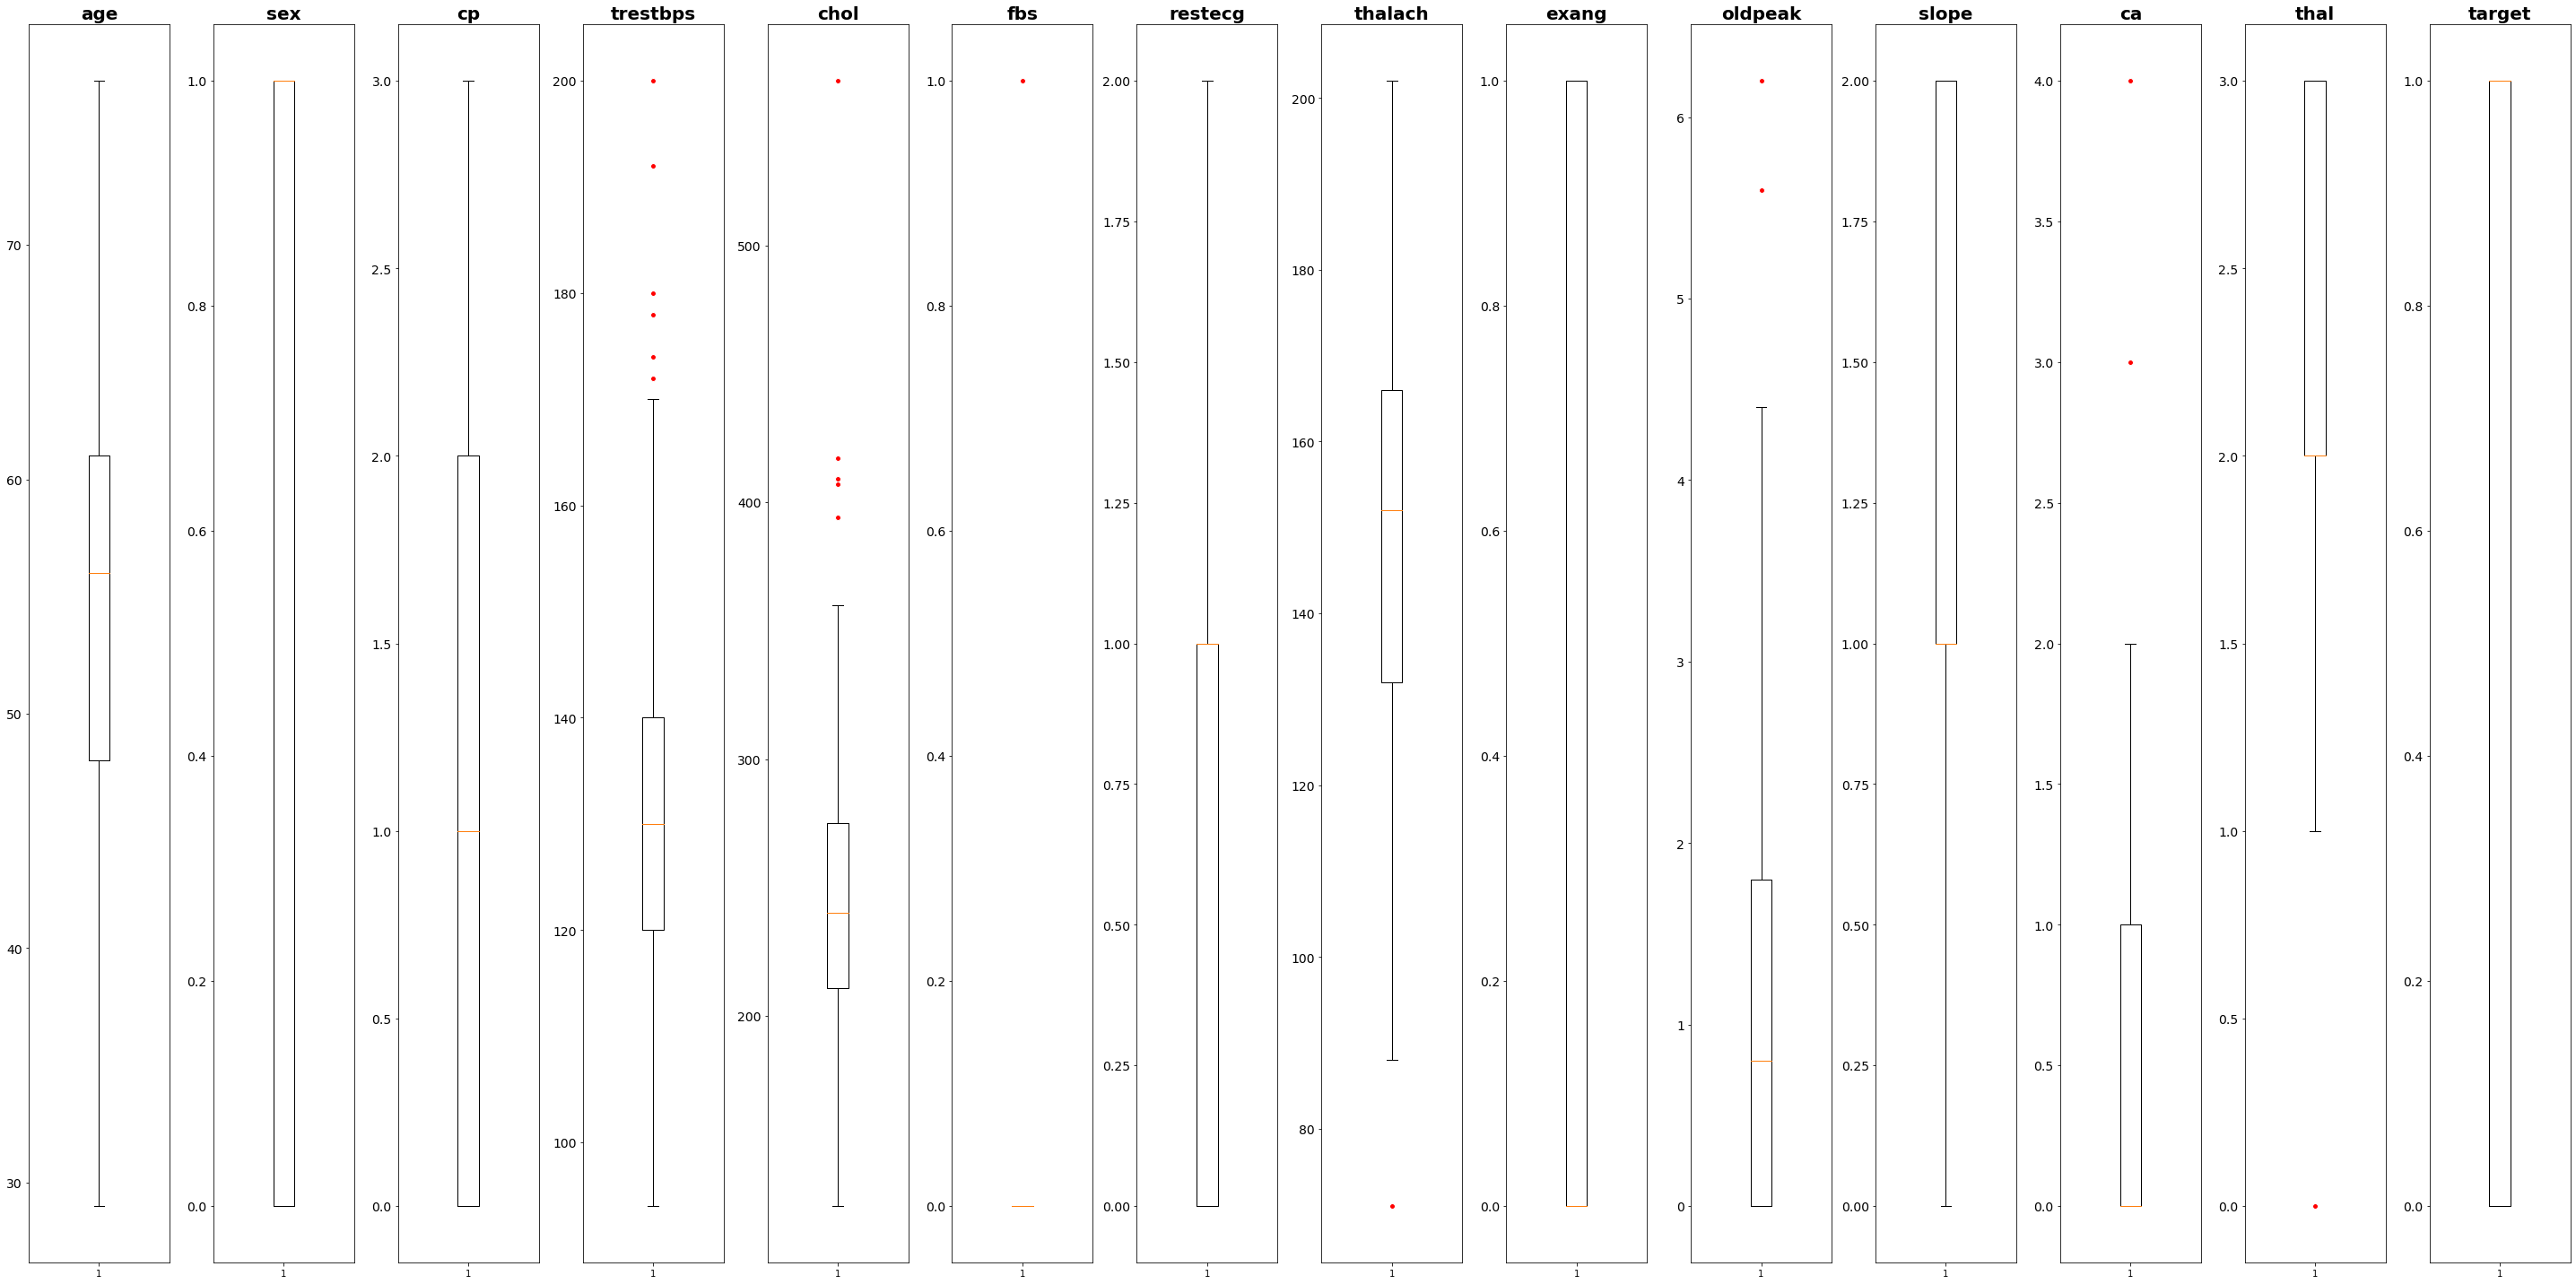

In [461]:
#Creating subplot of each column with its own scale
red_circle=dict(markerfacecolor="red",marker="o",markeredgecolor="white")
fig, axs = plt.subplots(1,len(data.columns),figsize=(40,20))
for i, ax in enumerate(axs.flat):
    ax.boxplot(data.iloc[:,i],flierprops=red_circle)
    ax.set_title(data.columns[i],fontsize=20,fontweight="bold")
    ax.tick_params(axis="y",labelsize=14)
    
plt.tight_layout()




In [462]:
#create a function to calculate IQR bounds
def IQR_bounds(dataframe, column_name, multiple):
    """Extract the upper and lower bound for outlier detection using IQR
    
    Input:
        dataframe: Dataframe you want to extract the upper and lower bound from
        column_name: column name you want to extract upper and lower bound for
        multiple: The multiple to use to extract this
        
    Output:
        lower_bound = lower bound for column
        upper_bound = upper bound for column"""
    
    #extract the quantiles for the column
    lower_quantile = dataframe[column_name].quantile(0.25)
    upper_quantile = dataframe[column_name].quantile(0.75)
    #cauclat IQR
    IQR = upper_quantile - lower_quantile
    
    #extract lower and upper bound
    lower_bound = lower_quantile - multiple * IQR
    upper_bound = upper_quantile + multiple * IQR
    
    #retrun these values
    return lower_bound, upper_bound
#set the columns we want
columns = ['trestbps', 'chol', 'oldpeak', 'ca', 'thal']
#create a dictionary to store the bounds
column_bounds = {}
#iteratre over each column to extract bounds
for column in columns:
    #extract normal and extreme bounds
    lower_bound, upper_bound =  IQR_bounds(data, column, 1.5)
    #send them to the dictionary
    column_bounds[column] = [lower_bound, upper_bound]
#create the normal dataframe
df_new_IQR_AD = data[(data["trestbps"] < column_bounds["trestbps"][0]) | 
                         (data["trestbps"] > column_bounds["trestbps"][1]) |
                         (data["chol"] < column_bounds["chol"][0]) | 
                         (data["chol"] > column_bounds["chol"][1]) |
                       (data["oldpeak"] < column_bounds["oldpeak"][0]) | 
                         (data["oldpeak"] > column_bounds["oldpeak"][1]) |
                         (data["ca"] < column_bounds["ca"][0]) | 
                         (data["ca"] > column_bounds["ca"][1])|
                         (data["thal"] < column_bounds["thal"][0]) | 
                         (data["thal"] > column_bounds["thal"][1])
                        ]

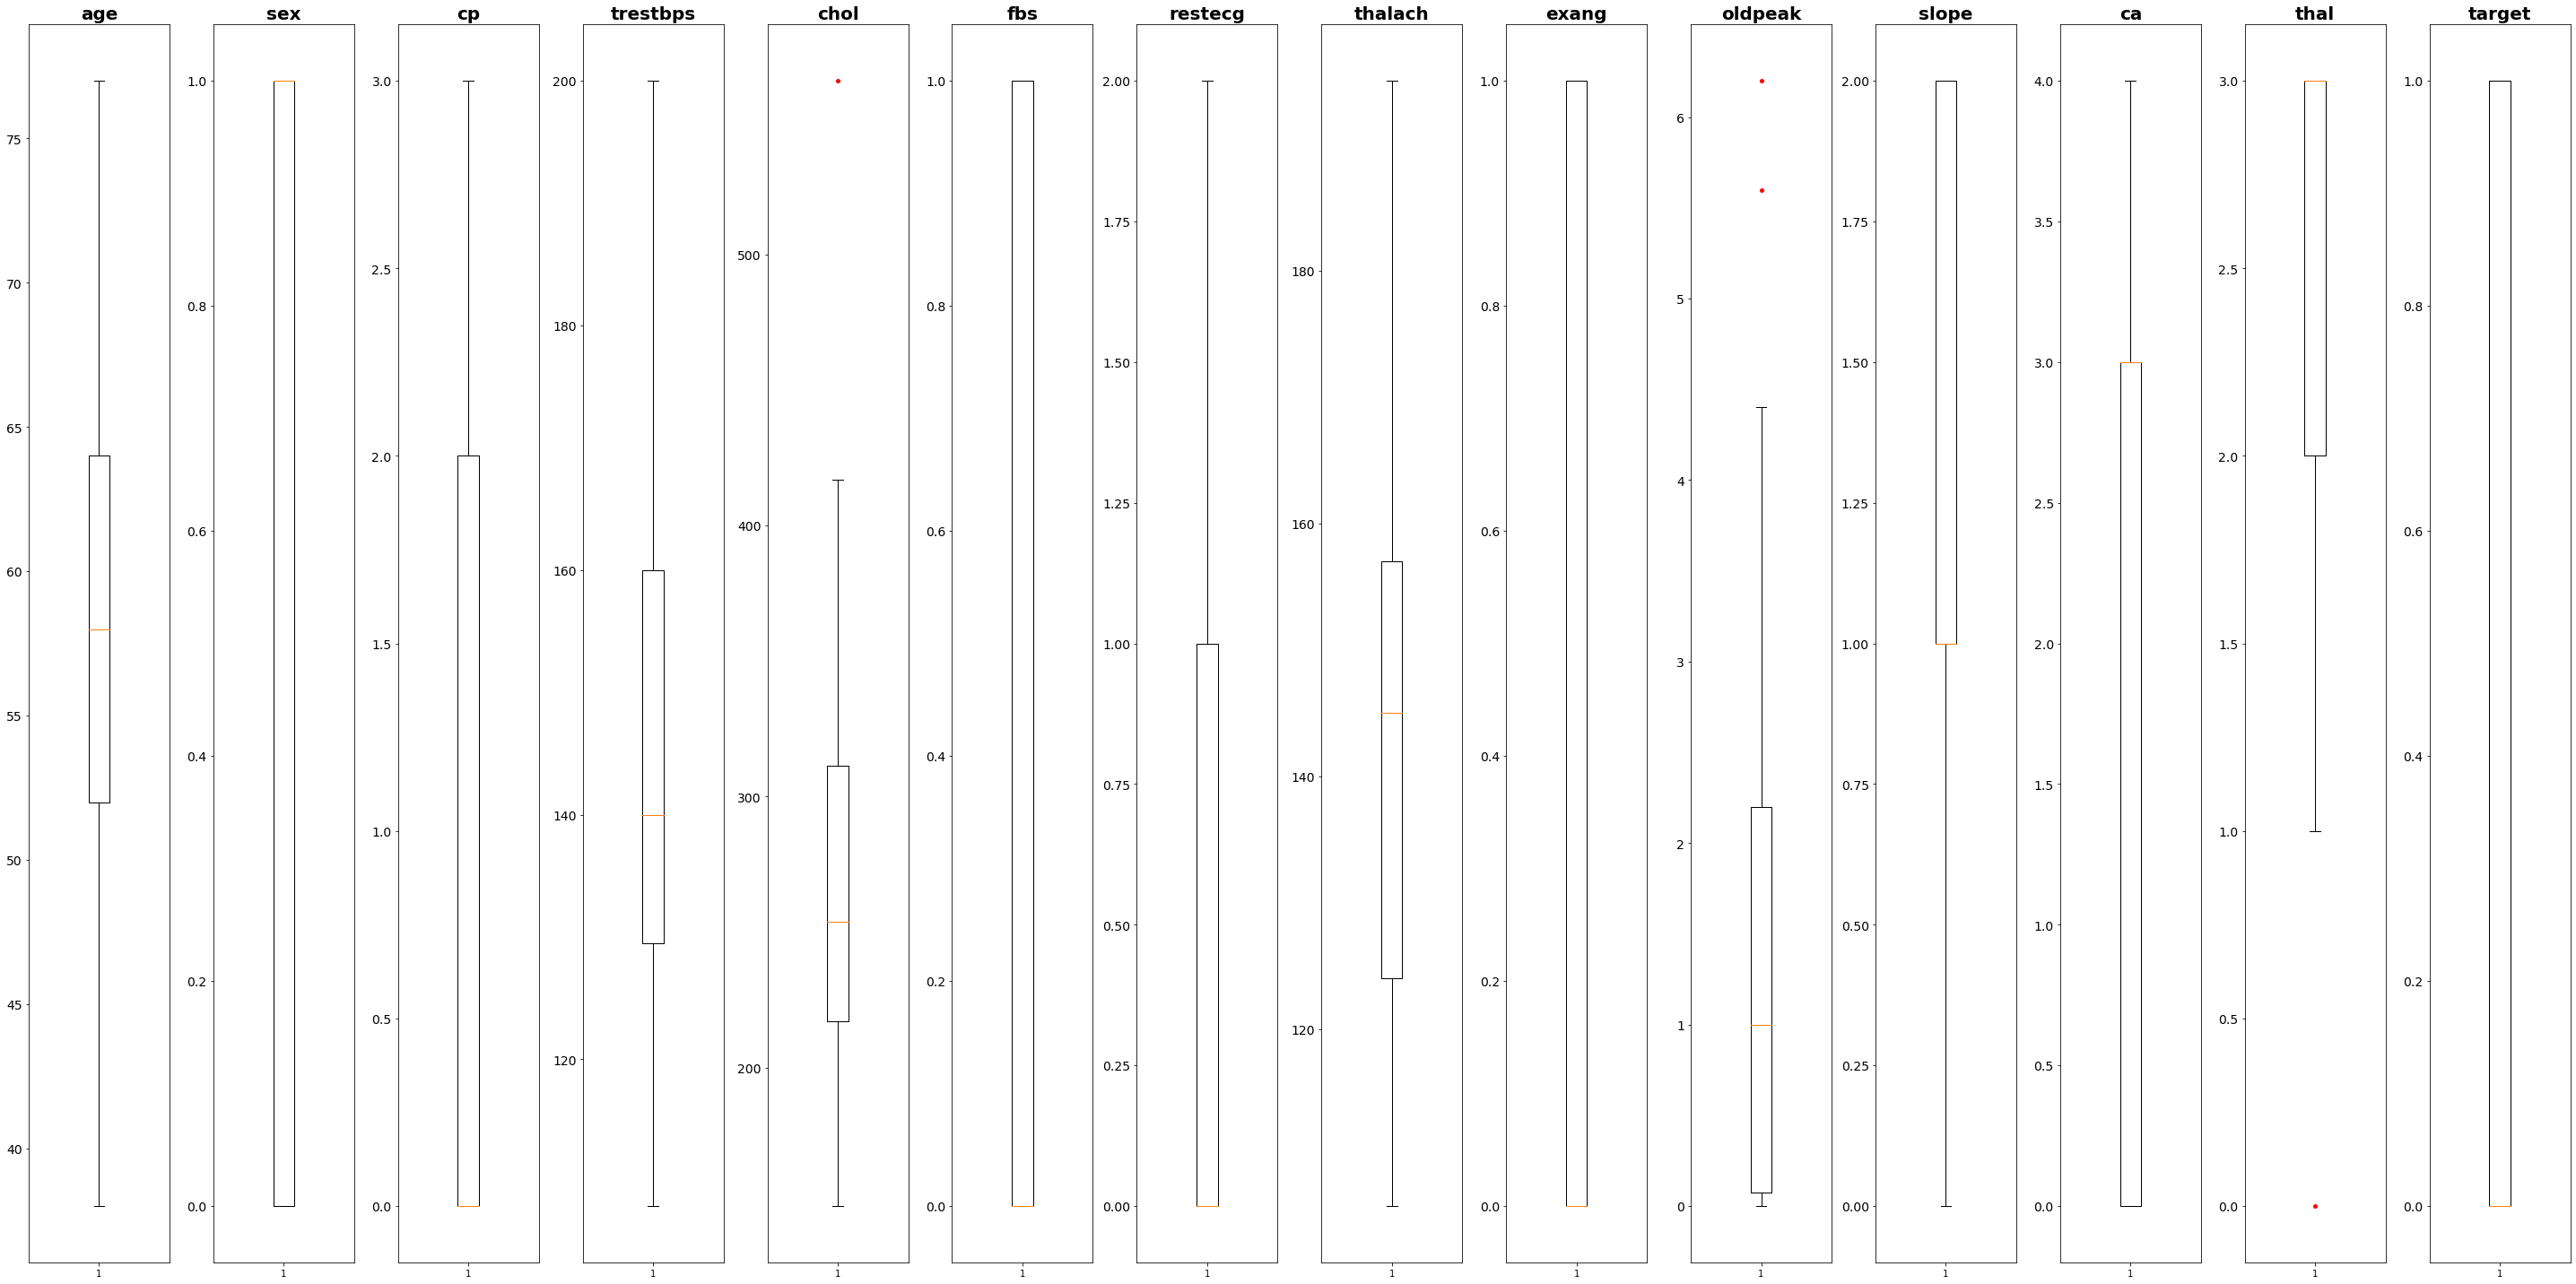

In [463]:
red_circle=dict(markerfacecolor="red",marker="o",markeredgecolor="white")
fig, axs = plt.subplots(1,len(df_new_IQR_AD.columns),figsize=(40,20))
for i, ax in enumerate(axs.flat):
    ax.boxplot(df_new_IQR_AD.iloc[:,i],flierprops=red_circle)
    ax.set_title(df_new_IQR_AD.columns[i],fontsize=20,fontweight="bold")
    ax.tick_params(axis="y",labelsize=14)
    
plt.tight_layout()

In [7]:
Accuracy = (0.86,0.90,1.0,0.98,0.80,0.90,0.96,0.96,0.98)

In [8]:
len(Accuracy)

9

In [9]:
Classifier = ["LR","SVM","RF","DT","NB","K-NN","GB","AB","XGBOOST"]
F1_score=(0.85,0.90,1,0.99,0.79,0.91,0.96,0.97,0.99)

In [10]:
len(Classifier)

9

In [11]:
import matplotlib.pyplot as plt
import numpy as np

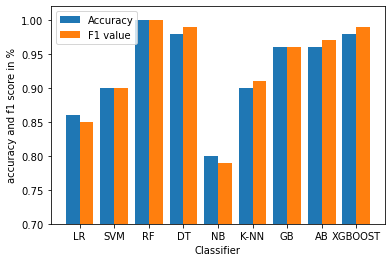

In [18]:
w=0.4
bar1=np.arange(len(Classifier))
plt.ylim([0.70,1.02])

bar2=[i+w for i in bar1]
plt.bar(bar1,Accuracy,0.4,label="Accuracy")
plt.bar(bar2,F1_score,0.4,label="F1 value")
plt.xlabel("Classifier")
plt.ylabel("accuracy and f1 score in %")
plt.xticks(bar1+w/2,Classifier)
plt.legend()
plt.savefig('test_4.jpg')
